In [131]:
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
'''Useful functions'''
def sigmoid(z):
    return 1/ (1+ np.exp(-z))  

def sigmoidPrime(z):
    return np.exp(-z) / ((1+np.exp(-z))**2)

In [133]:
import numpy as np
from numpy.linalg import norm

class Neural_Network(object):
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize, Lambda):
        #Define Hyperparameters:
        self.inputLayerSize = inputLayerSize 
        self.outputLayerSize = outputLayerSize
        
        # hidden layers 
        self.nbhiddenLayers = len(hiddenLayerSize)
        self.hiddenLayerSize = hiddenLayerSize
        
        self.Lambda = Lambda
        
        # weights matrices
        self.W = []
        self.W.append(np.random.rand(self.inputLayerSize,self.hiddenLayerSize[0]))
        for i in range(self.nbhiddenLayers - 1):
            self.W.append(np.random.rand(self.hiddenLayerSize[i],self.hiddenLayerSize[i+1]))
        self.W.append(np.random.rand(self.hiddenLayerSize[-1],self.outputLayerSize))

    
    def forward(self, X): 
        # propagate 
        self.z = []
        self.a = []
        X_copy = X
        for i in range(self.nbhiddenLayers+1):
            
            z = np.dot(X_copy, self.W[i])
            a = sigmoid(z)
      
            self.z.append(z)
            self.a.append(a)
            
            X_copy = a
            
        return self.a[-1]
        
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] 
        # normlisation : + (self.Lambda/2)*(norm(self.W1)+norm(self.W2)) 
        return J     
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        self.delta = []
        self.dJdW = []
        self.delta.insert(0, np.multiply(-(y-self.yHat), sigmoidPrime(self.z[-1])))
        #Add gradient of regularization term:
        self.dJdW.insert(0,np.dot(self.a[-2].T, self.delta[0])/X.shape[0] )
                    # + self.Lambda*self.W2 regu
        
        for i in range(self.nbhiddenLayers-1,0,-1):            
            self.delta.insert(0, np.dot(self.delta[0], self.W[i+1].T)*sigmoidPrime(self.z[i]))
            #Add gradient of regularization term:
            self.dJdW.insert( 0, np.dot(self.a[i-1].T, self.delta[0])/X.shape[0] )
                             #+ self.Lambda*self.W1 regu
        
        self.delta.insert(0, np.dot(self.delta[0], self.W[1].T)*sigmoidPrime(self.z[0]))
        #Add gradient of regularization term:
        self.dJdW.insert( 0, np.dot(X.T, self.delta[0])/X.shape[0] )
        
    def getParams(self):
        #get W1 and W2 rolled into vector
        params = np.concatenate([array.ravel() for array in NN.W])
        return params
    
    def setParams(self, params):
        #get W1 and W2 using single parameter vector
        W_start = 0
        W_end = self.hiddenLayerSize[0]*self.inputLayerSize
        self.W = []
        self.W.append(np.reshape(params[W_start: W_end], \
                            (self.inputLayerSize,self.hiddenLayerSize[0])))
        for i in range(self.nbhiddenLayers -1):
            W_start = W_end
            W_end = W_end + self.hiddenLayerSize[i]* self.hiddenLayerSize[i+1]
            self.W.append(np.reshape(params[W_start: W_end], \
                            (self.hiddenLayerSize[i],self.hiddenLayerSize[i+1])))
                    
        W_start = W_end
        W_end = W_end + self.hiddenLayerSize[self.nbhiddenLayers -1]* self.outputLayerSize
        self.W.append( np.reshape(params[W_start: W_end], \
                            (self.hiddenLayerSize[self.nbhiddenLayers -1],self.outputLayerSize)) )
    
    def computeGradients(self, X, y):
        self.costFunctionPrime(X, y)
        return np.concatenate([array.ravel() for array in self.dJdW])

In [134]:
X = np.random.rand(3,2)
y = np.random.rand(3,1)

In [143]:
from scipy import optimize
class Trainer(object):
    def __init__(self, N):
        self.N = N
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))  
    
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def train(self, X, y):
        
        self.X= X
        self.y= y
        
        # make empty list to store costs
        self.J = []
        params0 = self.N.getParams()
        options ={'maxiter' : 2000, 'disp':True}
        
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                                jac = True, method ='BFGS', args = (X,y) \
                                 , callback=self.callbackF
                                )
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [144]:
# inputLayerSize = 2 
# outputLayerSize = 1
# hiddenLayerSize = 3
Lambda = 0.0001 
NN = Neural_Network(inputLayerSize = 2, outputLayerSize = 1, hiddenLayerSize = [3,2,1], Lambda = 0.0001  )
T = Trainer(NN)

In [145]:
T.train(X, y)

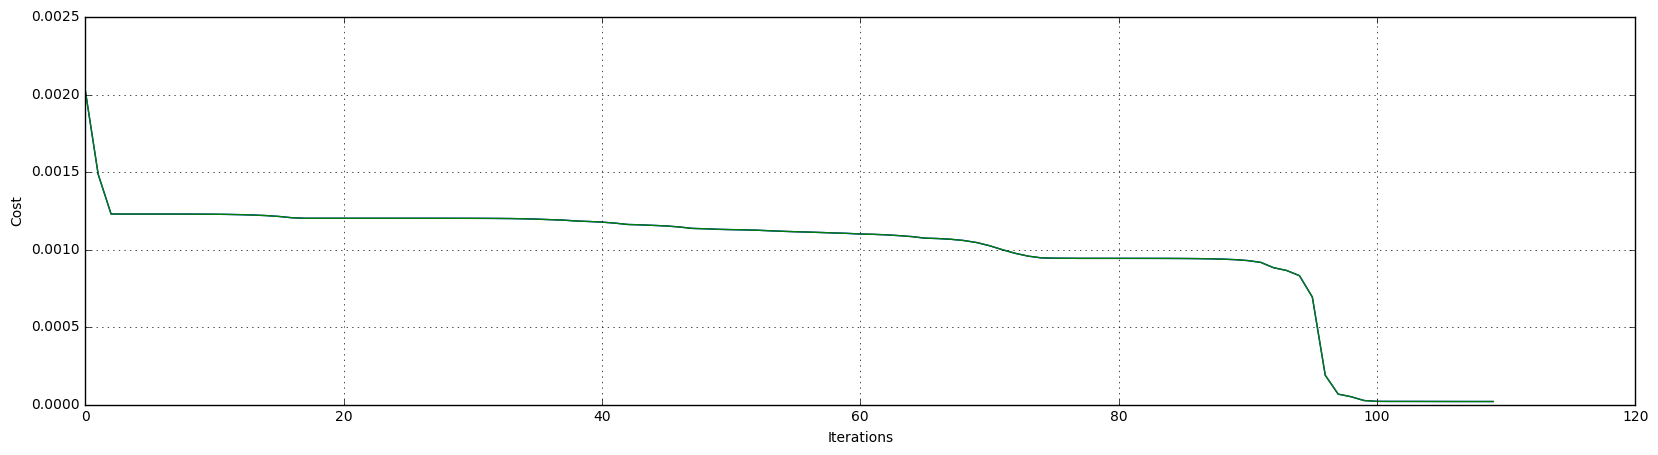

In [146]:
plt.figure(figsize=(20,5))
plt.plot(T.J)
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')